## Q1. How many multiplications and additions do you need to perform a matrix multiplication between a (n, k) and (k, m) matrix? Explain.

## Answer: As shown below with an example, when we multiply two matrices, number of multiplication and number of additions required is equal to (number of rows of first matrix * number of columns of first matrix or number of rows of second matrix * number of columns of second matrix). Therefore, if we perform matrix multiplication between (n,k) and (k,m) matrix then total number of multiplications and additions needed will be n\*m\*k. Number of additions will also be same because initially we will be addding zero while computing for each cell because initially in resultant matrix we have made all the elements as 0. But in general it will take n\*m\*(k-1) additions.

## Explanation - Taking the below example with two 3\*3 matrix. We know that resultant matrix after multiplication will also be 3\*3 matrix. Therefore total number of elements in the resultant matrix will be 9. So, if we focus on any one element let say first element of the resultant matrix then we can say that it has formed by multiplying first row of the first matrix with the first column of the second matrix which will need 3 multiplications as there are three elements present in both row and column. It will also need three additions per cell as we have first initialized the resultant matrix with all zeros, therefore this zero will also get added when we will be computing the final value of a particular cell along with the addition of the other multiplied elements as mentioned above. Therefore, total number of additions needed for each cell is also equal to 3. So, if we need 3 additions and 3 multiplications for each cell and we have total of 9 cells then we will need total of 27 additions and 27 multiplications in case of 3\*3 matrix and likewise we can proof for matrices of other dimensions as well.

In [ ]:
pip install numpy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import numpy as np
m = [[1, 2, 4],
     [1, 4, 4],
     [3, 2, 4]]
n = [[4, 5, 8],
     [3, 2, 3],
     [3, 2, 3]]

def multiply(m, n):
  countAdd = 0
  countMult = 0
  t1 = len(m)
  t2 = len(m[0])
  t3 = len(n)
  t4 = len(n[0])

  if t2 == t3:
    p = t1
    q = t4
    r = t2
  elif t4 == t1:
    p = t3
    q = t2
    r = t4
  result = np.zeros([p,q], dtype = int)

  for i in range(p):
      for j in range(q):
          for k in range(r):
              result[i][j] = result[i][j] + m[i][k]*n[k][j]
              countMult = countMult + 1
              countAdd = countAdd +  1
  for i in range(p):
    for j in range(q):
        print(result[i][j], end=" ")
    print("\n")
  print("Number of multiplication performed:",countMult, " ", "Number of addition performed: ",countAdd)
  print("When we multiply number of rows of matrix m with number of columns of m or number of rows of matrix n with number of columns of matrix n we get same result as above: ",p*q*r)

multiply(m,n)



22 17 26 

28 21 32 

30 27 42 

Number of multiplication performed: 27   Number of addition performed:  27
When we multiply number of rows of matrix m with number of columns of m or number of rows of matrix n with number of columns of matrix n we get same result as above:  27


## Q2. Write Python code to multiply the above two matrices. Solve using list of lists and then use numpy. Compare the timing of both solutions. Which one is faster? Why?

## Answer - In below code we can see that when we perform matrix multiplication, numpy array takes very less time compared to list of list. This is because numpy package is built using C language and in numpy array boundation in datatype is introduced which ensures only one type of element can be stored in the array unlike python lists where we can store different types elements having different data types. And in C, arrays are stored in contiguous memory location therefore elements access time is much less compared to python lists. Thus numpy has advantage over python lists.

In [ ]:
import numpy as np

In [ ]:
# Multiplying two matrices using list of lists

def multiply_matrix(m, n):
  countAdd = 0
  countMult = 0
  t1 = len(m)
  t2 = len(m[0])
  t3 = len(n)
  t4 = len(n[0])

  if t2 == t3:
    p = t1
    q = t4
    r = t2
  elif t4 == t1:
    p = t3
    q = t2
    r = t4

  result = np.zeros([p,q], dtype = int)

  for i in range(p):
      for j in range(q):
          for k in range(r):
              result[i][j] = result[i][j] + m[i][k]*n[k][j]

def multiply_matrix_np(m,n):
    return np.matmul(m,n)


M = np.random.randint(0, 1000, size=(5, 2))
N = np.random.randint(0, 1000, size=(2, 5))

print("Average time taken to multiply two matrices without using numpy : ")
%timeit -n 1000 multiply_matrix(M, N)
print("\n")
print("Average time taken to multiply two matrices using numpy : ")
%timeit -n 1000 multiply_matrix_np(M, N)

Average time taken to multiply two matrices without using numpy : 
68 µs ± 3.59 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


Average time taken to multiply two matrices using numpy : 
1.75 µs ± 663 ns per loop (mean ± std. dev. of 7 runs, 1000 loops each)


## Q3. Finding the highest element in a list requires one pass of the array. Finding the second highest element requires 2 passes of the the array. Using this method, what is the time complexity of finding the median of the array? Can you suggest a better method? Can you implement both these methods in Python and compare against numpy.median routine in terms of time?

## Answer: The method mentioned in the question will take O(n^2) time complexity as for finding highest element at each iteration will go through comparing with all the elements present in the array. And if we go on finding first highest, second highest and so on, then we will have to iterate through the array again and again and this will be equal to the length of the array. Therefore, time complexity will be equal to O(n^2).

## We can improvise the same by performing sorting operation in O(nlogn) time and then finding the median in O(1) time.

In [8]:
import numpy as np

def median_find(l):
  ar = l.copy()
  newdict = {}
  m=0
  max = ar[0]
  for i in range(len(ar)):
    if max < ar[i]:
      max = ar[i]
  highest = max+1

  for i in range(0, len(ar)):
    maxval = 0
    for j in range(0, len(ar)):
      if maxval < ar[j] and ar[j] < highest:
        max = j
        maxval = ar[j]
    newdict[m] = ar[max]
    m = m+1
    ar[max] = highest
  temp = len(ar)
  media = 0
  if temp % 2 == 0:
    meda = (newdict[temp//2] + newdict[(temp//2)-1])/2
  else:
    meda = newdict[temp//2]

def med(ar):
    median = 0
    ar = sorted(ar)
    length = len(ar)
    if length % 2 != 0:
        median = ar[(length//2)]
    else:
        median = (ar[((length//2)-1)] + ar[(length//2)]) / 2

def mednp(ar):
    np.median(ar)

ar = np.random.choice(10000000, size=(2000), replace=False)
median_find(ar)
med(ar)
print("Average time taken by the approch mentioned in the question is : ")
%timeit -n 100 median_find(ar) 
print("\n")
print("Average time taken by more efficient approch is : ")
%timeit -n 100 med(ar)
print("\n")
print("Average time taken by numpy.median is : ")
%timeit -n 100 mednp(ar) 

Average time taken by the approch mentioned in the question is : 
875 ms ± 6.8 ms per loop (mean ± std. dev. of 7 runs, 100 loops each)


Average time taken by more efficient approch is : 
659 µs ± 38.8 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


Average time taken by numpy.median is : 
30.5 µs ± 3.95 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


### Q4. What is the gradient of the following function with respect to x and y? 
$x^2y+y^3sin(x)$


## Answer: 
#### $\partial f(x,y)/\partial x = 2xy + y^3 cos(x)$
#### $\partial f(x,y)/\partial y = x^2 + 3y^2 sin(x)$

## Q5. Use JAX to confirm the gradient evaluated by your method matches the analytical solution corresponding to a few random values of x and y 

In [ ]:
pip install jax jaxlib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import math
import numpy as np
import jax.numpy as jp
from jax import grad, jit, random

def fX(x, y):
    return (x**2)*y + (y**3)*jp.sin(x)
def fY(x, y):
    return (y**2)*x + (x**3)*jp.sin(y)

# Defining the gradient of the function with respect to x and y
def gradientX(x, y):
    return 2*x*y + (y**3)*math.cos(x)
def gradientY(x, y):
    return y**2 + 3*(x**2)*math.sin(y)

x = np.random.randn()
y = np.random.randn()

numeric_gradient_X = grad(fX)(x, y)
numeric_gradient_Y = grad(fY)(x, y)

analytical_gradient_X = gradientX(x, y)
analytical_gradient_Y = gradientY(x, y)

print("Numeric gradient w.r.t x is: ",numeric_gradient_X)
print("Analytical gradient w.r.t x is:",analytical_gradient_X)
print("\n")
print("Numeric gradient w.r.t y is",numeric_gradient_Y)
print("Analytical gradient w.r.t y is",analytical_gradient_Y)

Numeric gradient w.r.t x is:  4.708359
Analytical gradient w.r.t x is: 4.708359268284021


Numeric gradient w.r.t y is 8.02011
Analytical gradient w.r.t y is 8.02011021605116


## Q6. Use sympy to confirm that you obtain the same gradient analytically.


In [ ]:
import sympy
from sympy import diff, symbols

x, y = sympy.symbols('x y')

f = (x**2)*y + (y**3)*sympy.sin(x)

grad_x = diff(f,x)
grad_y = diff(f,y)
print("Partial derivative w.r.t x :",grad_x)
print("Partial derivative w.r.t y :",grad_y)

Partial derivative w.r.t x : 2*x*y + y**3*cos(x)
Partial derivative w.r.t y : x**2 + 3*y**2*sin(x)


## Q7. Create a Python nested dictionary to represent hierarchical information. We want to store record of students and their marks. 

In [ ]:
from pprint import pprint

years = [2022, 2023, 2024, 2025]
branches = ['Branch 1', 'Branch 2']
students = [
    {'Roll Number': 1, 'Name': 'N', 'Marks': {'Maths': 100, 'English': 70}},
    {'Roll Number': 2, 'Name': 'M', 'Marks': {'Maths': 90, 'English': 80}},
]

students_data = {}

for year in years:
    students_data[year] = {}
    for branch in branches:
        students_data[year][branch] = []
        for student in students:
            students_data[year][branch].append(student)

pprint(students_data)

{2022: {'Branch 1': [{'Marks': {'English': 70, 'Maths': 100},
                      'Name': 'N',
                      'Roll Number': 1},
                     {'Marks': {'English': 80, 'Maths': 90},
                      'Name': 'M',
                      'Roll Number': 2}],
        'Branch 2': [{'Marks': {'English': 70, 'Maths': 100},
                      'Name': 'N',
                      'Roll Number': 1},
                     {'Marks': {'English': 80, 'Maths': 90},
                      'Name': 'M',
                      'Roll Number': 2}]},
 2023: {'Branch 1': [{'Marks': {'English': 70, 'Maths': 100},
                      'Name': 'N',
                      'Roll Number': 1},
                     {'Marks': {'English': 80, 'Maths': 90},
                      'Name': 'M',
                      'Roll Number': 2}],
        'Branch 2': [{'Marks': {'English': 70, 'Maths': 100},
                      'Name': 'N',
                      'Roll Number': 1},
                     {'Marks': {'

## Q8. Store the same information using Python classes. We have an overall database which is a list of year objects. Each year contains a list of branches. Each branch contains a list of students. Each student has some properties like name, roll number and has marks in some subjects.
## Answer:


In [6]:
class Year:
    def __init__(self):
        self.years = []
        self.branch = self.Branch()
    def add_year(self, year):
        self.years.append(year)

    class Branch:
        def __init__(self):
          self.branches = {}
        def add_branch(self, name):
          self.branches[name] = name

class Student:
    def __init__(self, name, roll_number):
        self.roll_number = roll_number
        self.name = name

class Marks:
  def __init__(self, mark1, mark2):
    self.marks = {"English": mark1, "Maths": mark2}


mr = Marks(90, 86)
sr = Marks(78, 99)

st = Student("Kunal",1)
rt = Student("Hardik",2)

yr = Year()
yr.add_year(2023)
yr.add_year(2024)

br = yr.branch
cr = yr.branch
br.add_branch("Branch_1")
cr.add_branch("Branch_2")

student1 = {"Name":st.name,"Roll_numberst":st.roll_number,"Marks": {"English": mr.marks["English"], "Maths": mr.marks["Maths"]}}
student2 = {"Name":rt.name,"Roll_numberst":rt.roll_number,"Marks": {"English": sr.marks["English"], "Maths": sr.marks["Maths"]}}

years = dict()

years = {"Years": yr.years, "Branch": yr.branch.branches}
students = {"students": [student1, student2]}

for i in years["Years"]:
  print(i, ":")
  for j in years["Branch"]:
    print(j,":")
    for k in students["students"]:
      print(k)
        

2023 :
Branch_1 :
{'Name': 'Kunal', 'Roll_numberst': 1, 'Marks': {'English': 90, 'Maths': 86}}
{'Name': 'Hardik', 'Roll_numberst': 2, 'Marks': {'English': 78, 'Maths': 99}}
Branch_2 :
{'Name': 'Kunal', 'Roll_numberst': 1, 'Marks': {'English': 90, 'Maths': 86}}
{'Name': 'Hardik', 'Roll_numberst': 2, 'Marks': {'English': 78, 'Maths': 99}}
2024 :
Branch_1 :
{'Name': 'Kunal', 'Roll_numberst': 1, 'Marks': {'English': 90, 'Maths': 86}}
{'Name': 'Hardik', 'Roll_numberst': 2, 'Marks': {'English': 78, 'Maths': 99}}
Branch_2 :
{'Name': 'Kunal', 'Roll_numberst': 1, 'Marks': {'English': 90, 'Maths': 86}}
{'Name': 'Hardik', 'Roll_numberst': 2, 'Marks': {'English': 78, 'Maths': 99}}


## Q9. Using matplotlib plot the following functions on the domain: x = 0.5 to 100.0 in steps of 0.5.
1. $y = x$
2. $y = x^2$
3. $y = x^3/100$
4. $y = sin(x)$
5. $y = sin(x)/x$
6. $y = log(x)$
7. $y = e^x$

## Answer:

<ipython-input-273-af0230b1c314>:19: RuntimeWarning: divide by zero encountered in log
  Y5 = np.log(X)
<ipython-input-273-af0230b1c314>:21: RuntimeWarning: invalid value encountered in true_divide
  Y6 = np.sin(x)/x


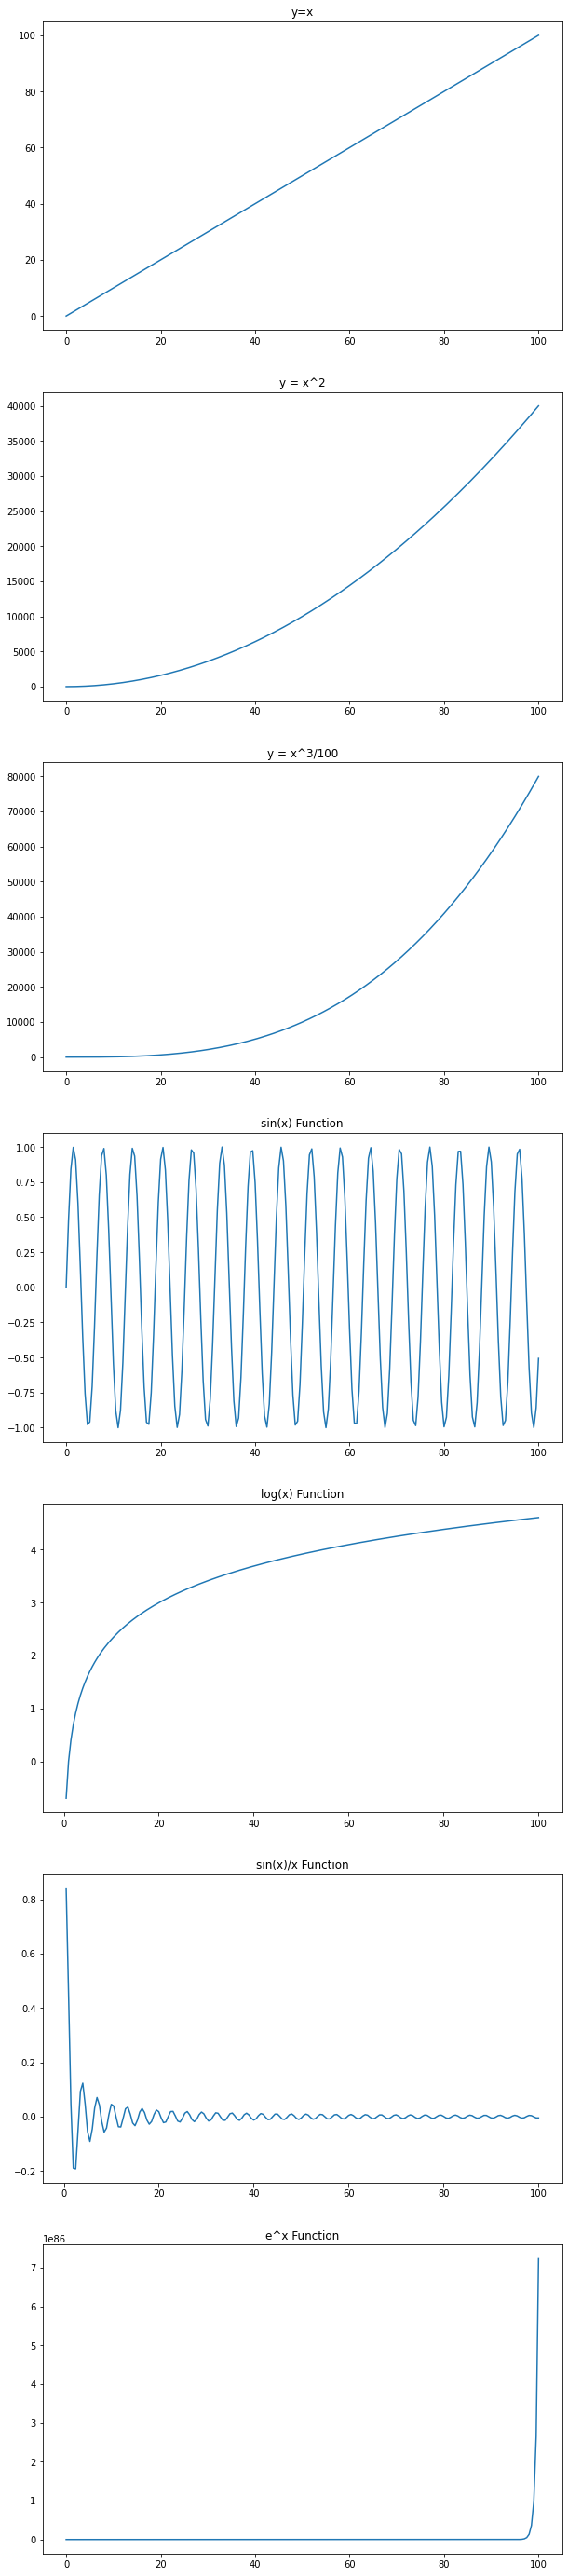

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import math

x = list(range(201))
X = [0.5 * i for i in x]


Y1 = X

Y2 = []
Y2 = [i**2 for i in x]

Y3 = []
Y3 = [(i**3)/100 for i in x]

Y4 = np.sin(X)

Y5 = np.log(X)

Y6 = np.sin(x)/x

Y7 = np.exp(x)
  
# Initializing the subplot function using number of rows and columns
figure, axis = plt.subplots(7, 1)

figure.set_figheight(50)
figure.set_figwidth(10) 


axis[0].plot(X, Y1)
axis[0].set_title("y=x")

axis[1].plot(X, Y2)
axis[1].set_title("y = x^2")

axis[2].plot(X, Y3)
axis[2].set_title("y = x^3/100")

axis[3].plot(X, Y4)
axis[3].set_title("sin(x) Function")

axis[4].plot(X, Y5)
axis[4].set_title("log(x) Function")

axis[5].plot(X, Y6)
axis[5].set_title("sin(x)/x Function")

axis[6].plot(X, Y7)
axis[6].set_title("e^x Function")


plt.show()

## Q10. Using numpy generate a matrix of size 20X5 containing random numbers drawn uniformly from the range of 1 to 2. Using Pandas create a dataframe out of this matrix. Name the columns of the dataframe as “a”, “b”, “c”, “d”, “e”. Find the column with the highest standard deviation. Find the row with the lowest mean.
##Answer:

In [ ]:
import numpy as np
import pandas as pd

matrix = np.random.uniform(1, 2, size=(20, 5))
print(matrix)

df = pd.DataFrame(matrix, columns=['a', 'b', 'c', 'd', 'e'])
print(df)

stds = df.std()
max_std = stds.idxmax()
print("Column with maximum standard deviation is: ",max_std)

means = df.mean(axis=1)
min_mean = means.idxmin()
print("Row with lowest mean is: ",min_mean)

[[1.45581401 1.58519711 1.11442349 1.26448467 1.78084032]
 [1.93275366 1.06220695 1.81442668 1.47272865 1.2530857 ]
 [1.57435602 1.71100027 1.58596504 1.83548165 1.6250081 ]
 [1.79374851 1.4545185  1.44775969 1.1811512  1.09532999]
 [1.79688996 1.59020642 1.95795335 1.91169905 1.07863367]
 [1.85130661 1.53363693 1.93449812 1.85182232 1.03073843]
 [1.94831986 1.09266332 1.44860449 1.06391839 1.31165599]
 [1.80768778 1.05136951 1.44521491 1.60464673 1.67267063]
 [1.46185651 1.56175808 1.96530939 1.40431748 1.21375033]
 [1.09202624 1.31322975 1.29221523 1.74604611 1.69489734]
 [1.7129754  1.78795059 1.40566843 1.59172247 1.2112538 ]
 [1.34003817 1.55113193 1.83819716 1.59250749 1.5017627 ]
 [1.36103452 1.02455672 1.06577671 1.91444576 1.19665657]
 [1.40068282 1.68129025 1.48732916 1.83723545 1.67249324]
 [1.31006068 1.15200552 1.91228866 1.84270612 1.93397624]
 [1.63637226 1.42590166 1.526315   1.07393614 1.99531103]
 [1.10392566 1.56988754 1.76020958 1.10924013 1.76141123]
 [1.39025704 1

## Q11. Add a new column to the dataframe called “f” which is the sum of the columns “a”, “b”, “c”, “d”, “e”. Create another column called “g”. The value in the column “g” should be “LT8” if the value in the column “f” is less than 8 and “GT8” otherwise. Find the number of rows in the dataframe where the value in the column “g” is “LT8”. Find the standard deviation of the column “f” for the rows where the value in the column “g” is “LT8” and “GT8” respectively.
## Answer: 

In [ ]:
df['f'] = df[['a', 'b', 'c', 'd', 'e']].sum(axis=1)
print(df)

df['g'] = np.where(df['f'] < 8, 'LT8', 'GT8')
num = df['g'].value_counts()['LT8']
print("\n")
print("Number of rows in the dataframe where the value in the column “g” is “LT8” is: ",num)

std_lt8 = df[df['g'] == 'LT8']['f'].std()
std_gt8 = df[df['g'] == 'GT8']['f'].std()
print("\n")
print("Standard deviation of the column “f” for the rows where the value in the column “g” is “LT8” is: ",std_lt8)
print("\n")
print("Standard deviation of the column “f” for the rows where the value in the column “g” is “GT8” is: ",std_gt8)

           a         b         c         d         e         f
0   1.455814  1.585197  1.114423  1.264485  1.780840  7.200760
1   1.932754  1.062207  1.814427  1.472729  1.253086  7.535202
2   1.574356  1.711000  1.585965  1.835482  1.625008  8.331811
3   1.793749  1.454518  1.447760  1.181151  1.095330  6.972508
4   1.796890  1.590206  1.957953  1.911699  1.078634  8.335382
5   1.851307  1.533637  1.934498  1.851822  1.030738  8.202002
6   1.948320  1.092663  1.448604  1.063918  1.311656  6.865162
7   1.807688  1.051370  1.445215  1.604647  1.672671  7.581590
8   1.461857  1.561758  1.965309  1.404317  1.213750  7.606992
9   1.092026  1.313230  1.292215  1.746046  1.694897  7.138415
10  1.712975  1.787951  1.405668  1.591722  1.211254  7.709571
11  1.340038  1.551132  1.838197  1.592507  1.501763  7.823637
12  1.361035  1.024557  1.065777  1.914446  1.196657  6.562470
13  1.400683  1.681290  1.487329  1.837235  1.672493  8.079031
14  1.310061  1.152006  1.912289  1.842706  1.933976  8

## Q12. Write a small piece of code to explain broadcasting in numpy.
## Answer:

In [ ]:
import numpy as np

# 1D array
a = np.array([1, 2, 3])

# 2D array
b = np.array([[1, 2, 3],
              [4, 5, 6]])

# Here we are adding the 1D array to the 2D array using broadcasting
c = a + b

print(c)


[[2 4 6]
 [5 7 9]]


## Q13. Write a function to compute the argmin of a numpy array. The function should take a numpy array as input and return the index of the minimum element. You can use the np.argmin function to verify your solution.
## Answer:

In [ ]:
import numpy as np
ar = np.random.randint(1,1000, size=(5,5))

def argmin(ar):
    arr = list(ar.flatten())
    print("argmin output with our approach :",arr.index(min(arr)))
    print("\n")

print(ar)

argmin(ar)
print("argmin output with numpy.argmin approach :",np.argmin(ar))

[[411  84 756   6 208]
 [794 774 106 149 614]
 [930 574  95 762 759]
 [217 353 890 122 919]
 [886 959 511 838 944]]
argmin output with our approach : 3


argmin output with numpy.argmin approach : 3
